In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


intial_velocity = 45
acceleration = 9.81
intial_inclination = 45 #tilt 
radian = np.pi/180 * intial_inclination #Converting degree to radian
time_interval = 0.01
vertical_distance = 10
horizontal_distance = 0


R = np.array(([0.001,0],[0,0.001]))# Covariance matrix used to generate normally distributed random variable

Q = np.array(([0.10,0,0,0],
              [0,0.10,0,0],
              [0,0,0.10,0],
              [0,0,0,0.10])) #Covariance matrix Q

#Defining Kalman equations

def Kalman(time_interval,m_prior, Zigma_prior, o, Q, R): #o = linear observation model (position of ball)
                                                         #m_prior = mean vector
    C = np.array(([1,0,0,0],[0,1,0,0]))
    A = np.array(([1, 0, time_interval, 0],  #covariance matrix A
                  [0, 1, 0, time_interval],  
                  [0, 0, 1, 0],  
                  [0, 0, 0, 1]))
  
    a = np.array(([0],[-9.806],[0])) # action constant, acceleration due to gravity
    B = np.array(([0,0,0],
                  [0,(0.5*(time_interval**2)),0],
                  [0,0,0],
                  [0,time_interval,0])) #covariance matrix B



    
    Mt = (A @ m_prior) + (B @ a) #Project the state ahead
  
    Zigma_time = (A@( Zigma_prior@A.transpose())) + Q #Project the error covariance ahead

    K = Zigma_time @ (C.transpose() @ (np.linalg.inv(C @ (Zigma_time @ C.transpose()) + R)))
    
    # Compute Kalman gain
    M = Mt + (K @ (o - (C @ Mt))) #Update the Estimated via o(observed value)
    s = (np.identity(K.shape[0]) - (K@C))@Zigma_time #Update the error covariance
    return M, s 


uhd,uvd=[],[] #uhd -> updated horizontal distance
              #uvd -> updated vertical distance
              
measured_x,measured_y=[],[]
predicted_x,predicted_y=[],[]

Velocity = [] #Listing velocities

Estimated_velocitylist = [] #Listing Estimated velocities

Mt = np.array(([[0,0,0,0]])).transpose()

est = np.array(([0,10]))

Zigma_time = np.array(([1,0,0,0],
              [0,1,0,0],
              [0,0,1,0],
              [0,0,0,1]))



for t in np.arange(time_interval,1,time_interval):
    uhd.append(horizontal_distance),uvd.append(vertical_distance)
    
    x_velocity = intial_velocity * np.cos(radian )  #Velocity component in x direction
    y_velocity = intial_velocity * np.sin(radian ) - acceleration *t  #Velocity component in y direction
    
    intial_velocity = np.sqrt(x_velocity**2 + y_velocity**2)
    Velocity.append(intial_velocity)
    
    radian = np.arctan(y_velocity/x_velocity) #projecting angle
    
    horizontal_distance = horizontal_distance + (x_velocity * t)
    vertical_distance = vertical_distance+ (y_velocity*t) - (0.5*acceleration*(t**2)) #vertical distance of ball from the ground
    
    measured = np.random.multivariate_normal([0,0],R) #measured noise
    x_measured = horizontal_distance + measured[0]
    y_measured = vertical_distance + measured[1]
    measured_x.append(x_measured),measured_y.append(y_measured)
    
    observation = np.array(([[x_measured,y_measured]])).transpose()
    
    Mt,Zigma_time = Kalman(time_interval,Mt, Zigma_time, observation, Q, R)
    
    predicted_x.append(Mt[0])
    predicted_y.append((Mt[1]))
    
    x_velocity_estimated, y_velocity_estimated = (Mt[0]-est[0])/t, (Mt[1]-est[1])/t
    
    Estimated_velocity = np.sqrt(x_velocity_estimated**2 + y_velocity_estimated**2) #predicted velocity
    Estimated_velocitylist.append(Estimated_velocity)
    est = Mt[0:2]
    
    if vertical_distance<0:
        break

Text(0.5, 1.0, 'Trajectory motion of ball')

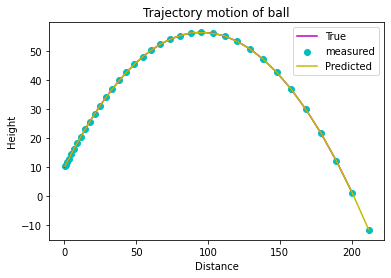

In [2]:
#plotting  the trajectory motion

plt.plot(uhd,uvd ,c='m',label='True')
plt.scatter(measured_x, measured_y,c='c',label='measured')
plt.xlabel('Distance')
plt.ylabel('Height')
plt.plot(predicted_x,predicted_y,c='y',label='Predicted')
plt.legend()
plt.title('Trajectory motion of ball')

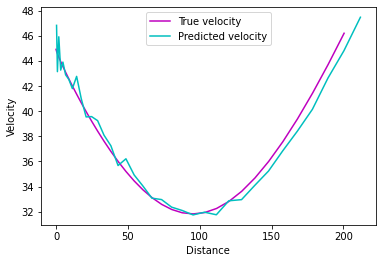

In [3]:
#plotting True velocity VS Kalman predicted velocity with respect to horizontal distance of ball covered 
plt.xlabel('Distance')
plt.ylabel('Velocity')
plt.plot(uhd,Velocity,c = 'm',label= 'True velocity')
plt.plot(predicted_x,Estimated_velocitylist,c = 'c',label='Predicted velocity')
plt.legend()

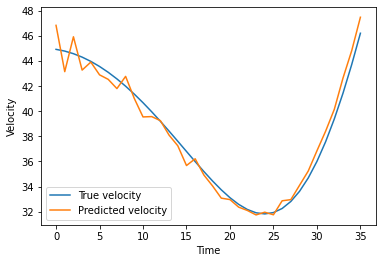

In [4]:
#plotting True velocity VS Kalman predicted velocity with respect to time
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.plot(Velocity,label= 'True velocity')
plt.plot(Estimated_velocitylist,label='Predicted velocity')
plt.legend()
plt.show()